In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Training data folder

In [2]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='E:/Flower NLP Project/df_train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 2562 files belonging to 5 classes.


# Subfolder image data

In [3]:
import os

train_dir = 'E:/Flower NLP Project/df_train'
subfolders = os.listdir(train_dir)
subfolder_counts = {}

for folder in subfolders:
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        print(f"Number of images in {folder}: {num_images}")
        subfolder_counts[folder] = num_images



Number of images in daisy: 501
Number of images in dandelion: 646
Number of images in rose: 468
Number of images in sunflower: 340
Number of images in tulip: 607


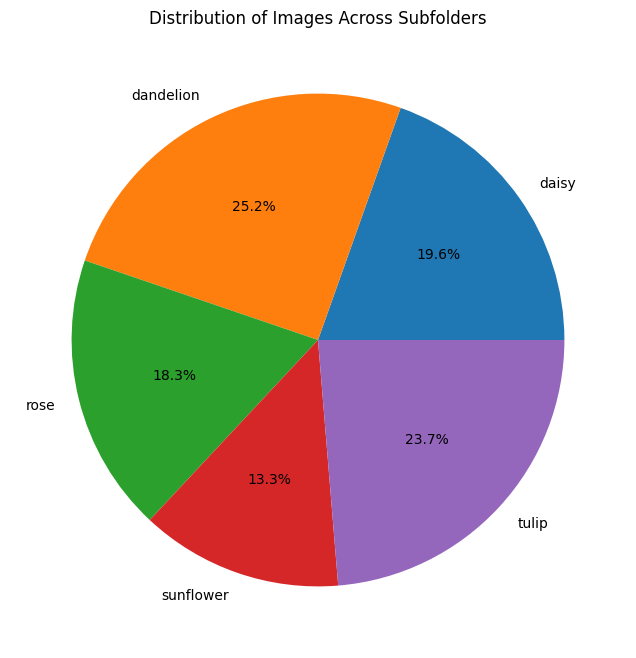

In [4]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(subfolder_counts.values(), labels=subfolder_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Images Across Subfolders')
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import cv2
import os
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.models import Model
from tensorflow.keras.layers import Activation, GlobalAveragePooling2D, Dropout, Flatten, Dense, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization
from tensorflow.keras.layers import Add
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Input
from keras.utils import to_categorical


In [10]:
train_path = 'E:/Flower NLP Project/df_train'
test_path = 'E:/Flower NLP Project/train'
class_names = os.listdir(train_path)
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [11]:
X = []
y = []

for i, class_name in enumerate(class_names): 
    class_path = os.path.join(train_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = imread(image_path) 

        image = cv2.resize(image, (224, 224))
        X.append(image)
        y.append(i)
X = np.array(X)
y = np.array(y)

In [12]:
X_t = []
y_t = []

for i, class_name in enumerate(class_names): 
    class_path = os.path.join(test_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = imread(image_path) 

        image = cv2.resize(image, (224, 224))
        X_t.append(image)
        y_t.append(i)
X_t = np.array(X_t)
y_t = np.array(y_t)

In [14]:
X_train, X_test_t, y_train, y_test = train_test_split(X_t, y_t, test_size = 0.2, random_state = 42, stratify = y_t)

In [15]:
y_train_encoded_t = to_categorical(y_train)
y_test_encoded_t = to_categorical(y_test)

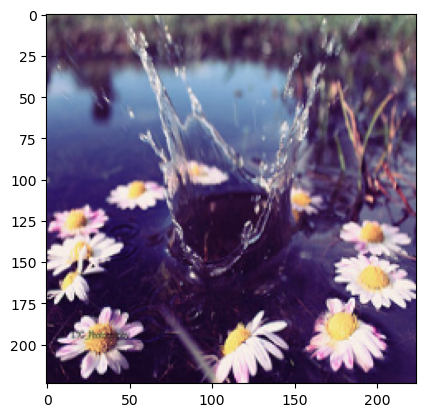

In [13]:
plt.imshow(X_t[1])

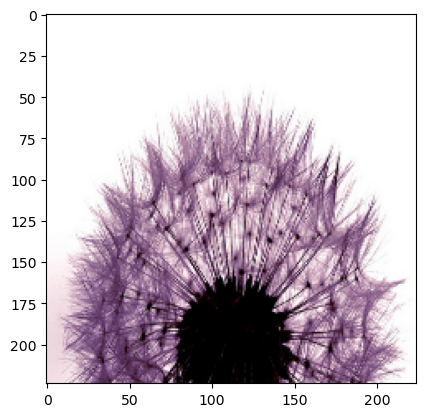

In [16]:
plt.imshow(X[923])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [18]:
# Convert target labels to one-hot encoded format
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [19]:
input_shape = 224, 224, 3
n_classes = 5

In [20]:
def vgg16(input_shape, n_classes):

    input = Input(input_shape)

    x = Conv2D(64, 3, padding="same", activation="relu")(input)
    x = Conv2D(64, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(128, 3, padding="same", activation="relu")(x)
    x = Conv2D(128, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = Conv2D(512, 3, padding="same", activation="relu")(x)
    x = MaxPool2D(2, strides=2, padding="same")(x)

    x = Flatten()(x)
    x = Dense(4096, activation="relu")(x)
    x = Dense(4096, activation="relu")(x)

    output = Dense(n_classes, activation="softmax")(x)

    model = Model(input, output)
    return model


model = vgg16(input_shape, n_classes)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,281,029 (512.24 MB)

 Trainable params: 134,281,029 (512.24 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 15)
history = model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_test_t, y_test_encoded_t), callbacks = early_stop)

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1140s 16s/step - accuracy: 0.2368 - loss: 1052.7834 - val_accuracy: 0.2244 - val_loss: 1.6205
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 648s 10s/step - accuracy: 0.2593 - loss: 1.6011 - val_accuracy: 0.2365 - val_loss: 1.6344
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 454s 7s/step - accuracy: 0.2373 - loss: 1.5964 - val_accuracy: 0.2244 - val_loss: 1.6170
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 564s 9s/step - accuracy: 0.2596 - loss: 1.5867 - val_accuracy: 0.2024 - val_loss: 1.6231
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 468s 7s/step - accuracy: 0.2497 - loss: 1.6052 - val_accuracy: 0.2244 - val_loss: 1.6142
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 403s 6s/step - accuracy: 0.2591 - loss: 1.5808 - val_accuracy: 0.2285 - val_loss: 1.6132
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 412s 6s/step - accuracy: 0.2628 - loss: 1.5951 - val_accuracy: 0.1964 - val_loss: 28.4045
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 403s 6s/step - accuracy: 0.2351 - loss: 3.2106 - val_accur

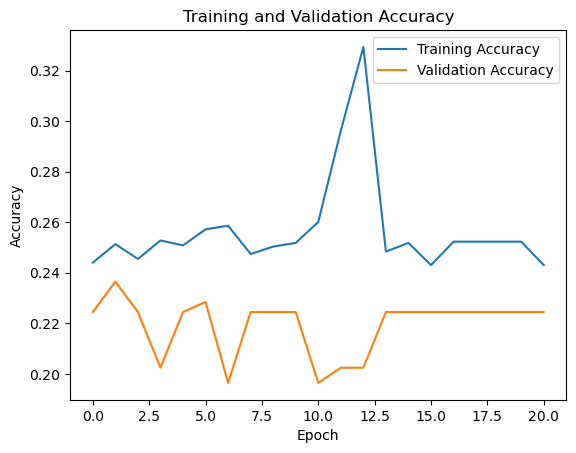

In [23]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

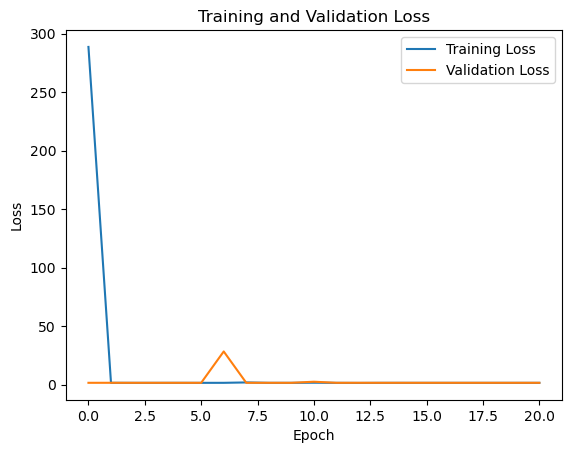

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [25]:
pred = model.predict(X_test)
predict_digits = np.argmax(pred, axis = 1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred=model.predict(X_train)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))

65/65 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step
[[  0 401   0   0   0]
 [  0 517   0   0   0]
 [  0 374   0   0   0]
 [  0 272   0   0   0]
 [  0 485   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       401
           1       0.25      1.00      0.40       517
           2       0.00      0.00      0.00       374
           3       0.00      0.00      0.00       272
           4       0.00      0.00      0.00       485

    accuracy                           0.25      2049
   macro avg       0.05      0.20      0.08      2049
weighted avg       0.06      0.25      0.10      2049



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
y_pred=model.predict(X_test)
probs = np.array(y_pred)
y_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step
[[  0 100   0   0   0]
 [  0 129   0   0   0]
 [  0  94   0   0   0]
 [  0  68   0   0   0]
 [  0 122   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.25      1.00      0.40       129
           2       0.00      0.00      0.00        94
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00       122

    accuracy                           0.25       513
   macro avg       0.05      0.20      0.08       513
weighted avg       0.06      0.25      0.10       513



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
train_path = 'E:/Flower NLP Project/df_train'
test_path = 'E:/Flower NLP Project/train'

In [41]:
class_names = os.listdir(train_path)
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred=model.predict(X_t)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_t, y_train_pred)) 
print(classification_report(y_t, y_train_pred))

78/78 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step
[[  0 489   0   0   0]
 [  0 559   0   0   0]
 [  0 470   0   0   0]
 [  0 473   0   0   0]
 [  0 503   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       489
           1       0.22      1.00      0.37       559
           2       0.00      0.00      0.00       470
           3       0.00      0.00      0.00       473
           4       0.00      0.00      0.00       503

    accuracy                           0.22      2494
   macro avg       0.04      0.20      0.07      2494
weighted avg       0.05      0.22      0.08      2494



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
